# <font size=100> <center><b>BIKE RENTAL PREDICTION USING MULTIPLE LINEAR REGRESSION</b></center>

# <b>Reading Data</b>

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.metrics import r2_score

In [2]:
#reading data
df = pd.read_csv('day.csv')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

# <b>Inspecting and Understanding Data</b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values and all the variables except dteday is numerical, so no cleaning of data required

In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# <b>Visualising Data</b>

In [6]:
#Replacing encoded values with actual values referring to data dictionary

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'clear',2:'misty',3:'lightRain',4:'heavyRain'},inplace = True)
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
df.yr.replace({0:2018,1:2019},inplace = True)
df.head()

instant      dteday  season    yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring  2018  jan        0     mon           1   
1        2  02-01-2018  spring  2018  jan        0     tue           1   
2        3  03-01-2018  spring  2018  jan        0     wed           1   
3        4  04-01-2018  spring  2018  jan        0     thu           1   
4        5  05-01-2018  spring  2018  jan        0     fri           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## BoxPlot of Categorical Variables for cnt

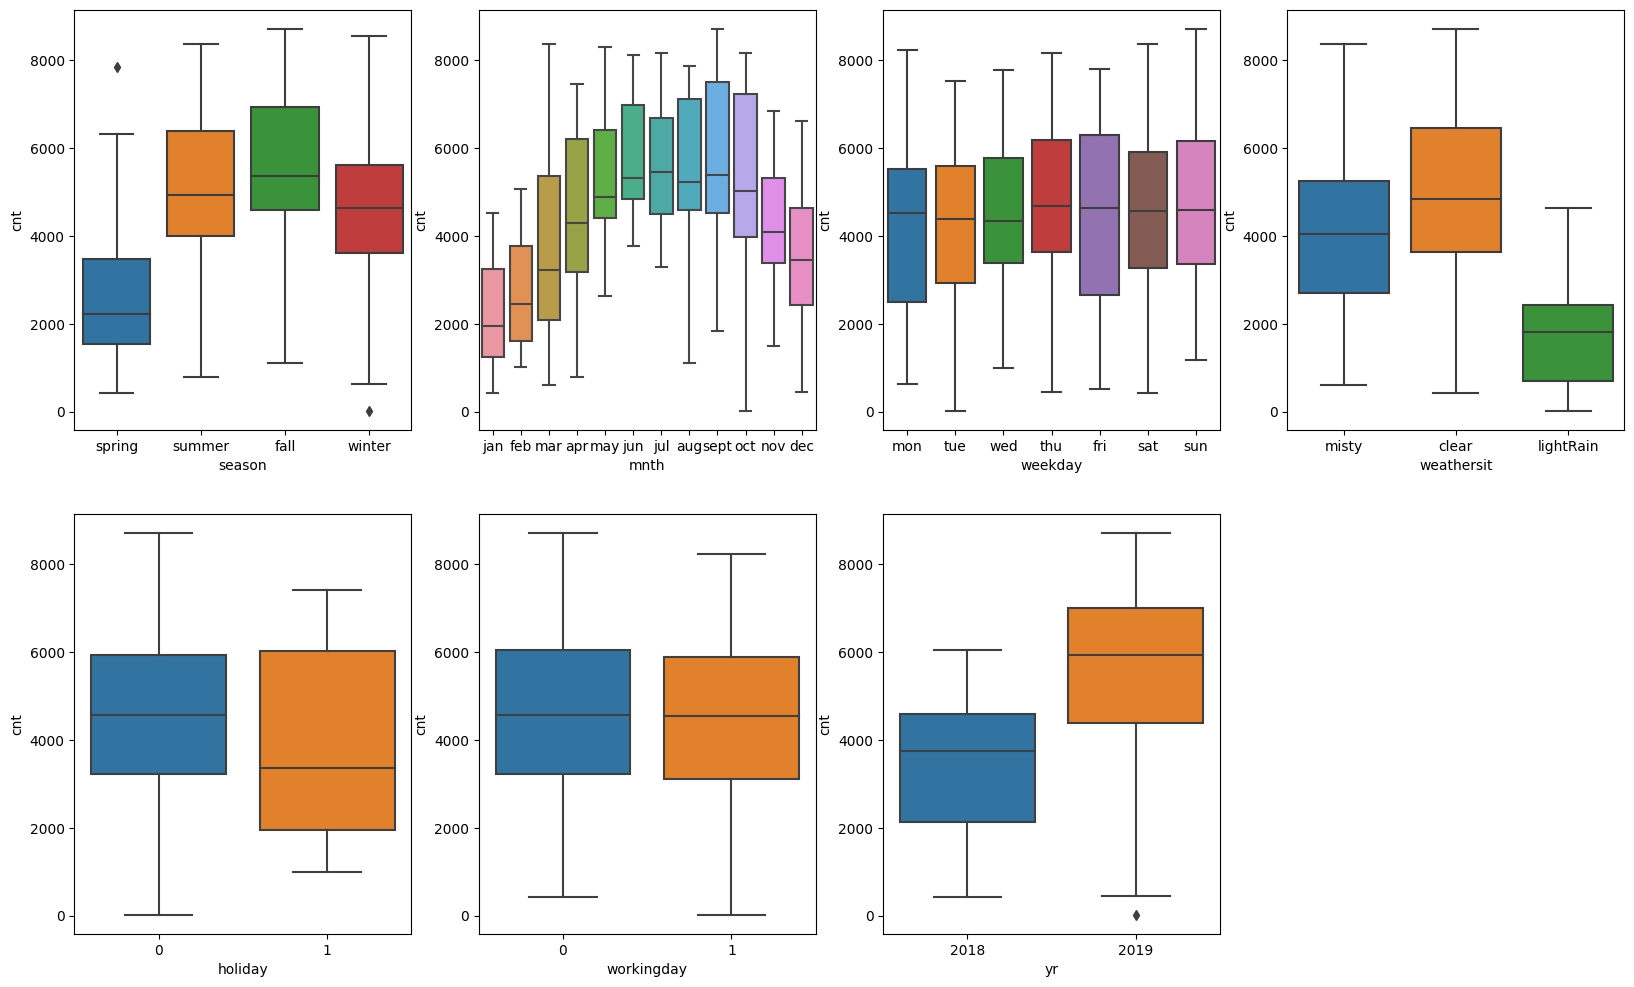

In [7]:
#Boxplot of Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

Summer and Fall seasons have more count of rentals, while Spring having the least. <br>
The count increases until the Month of October and then drops gradualy<br>
Year 2019 has more rental count than 2018<br>
Clear weather has more number of rentals

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Scatter plot of Data

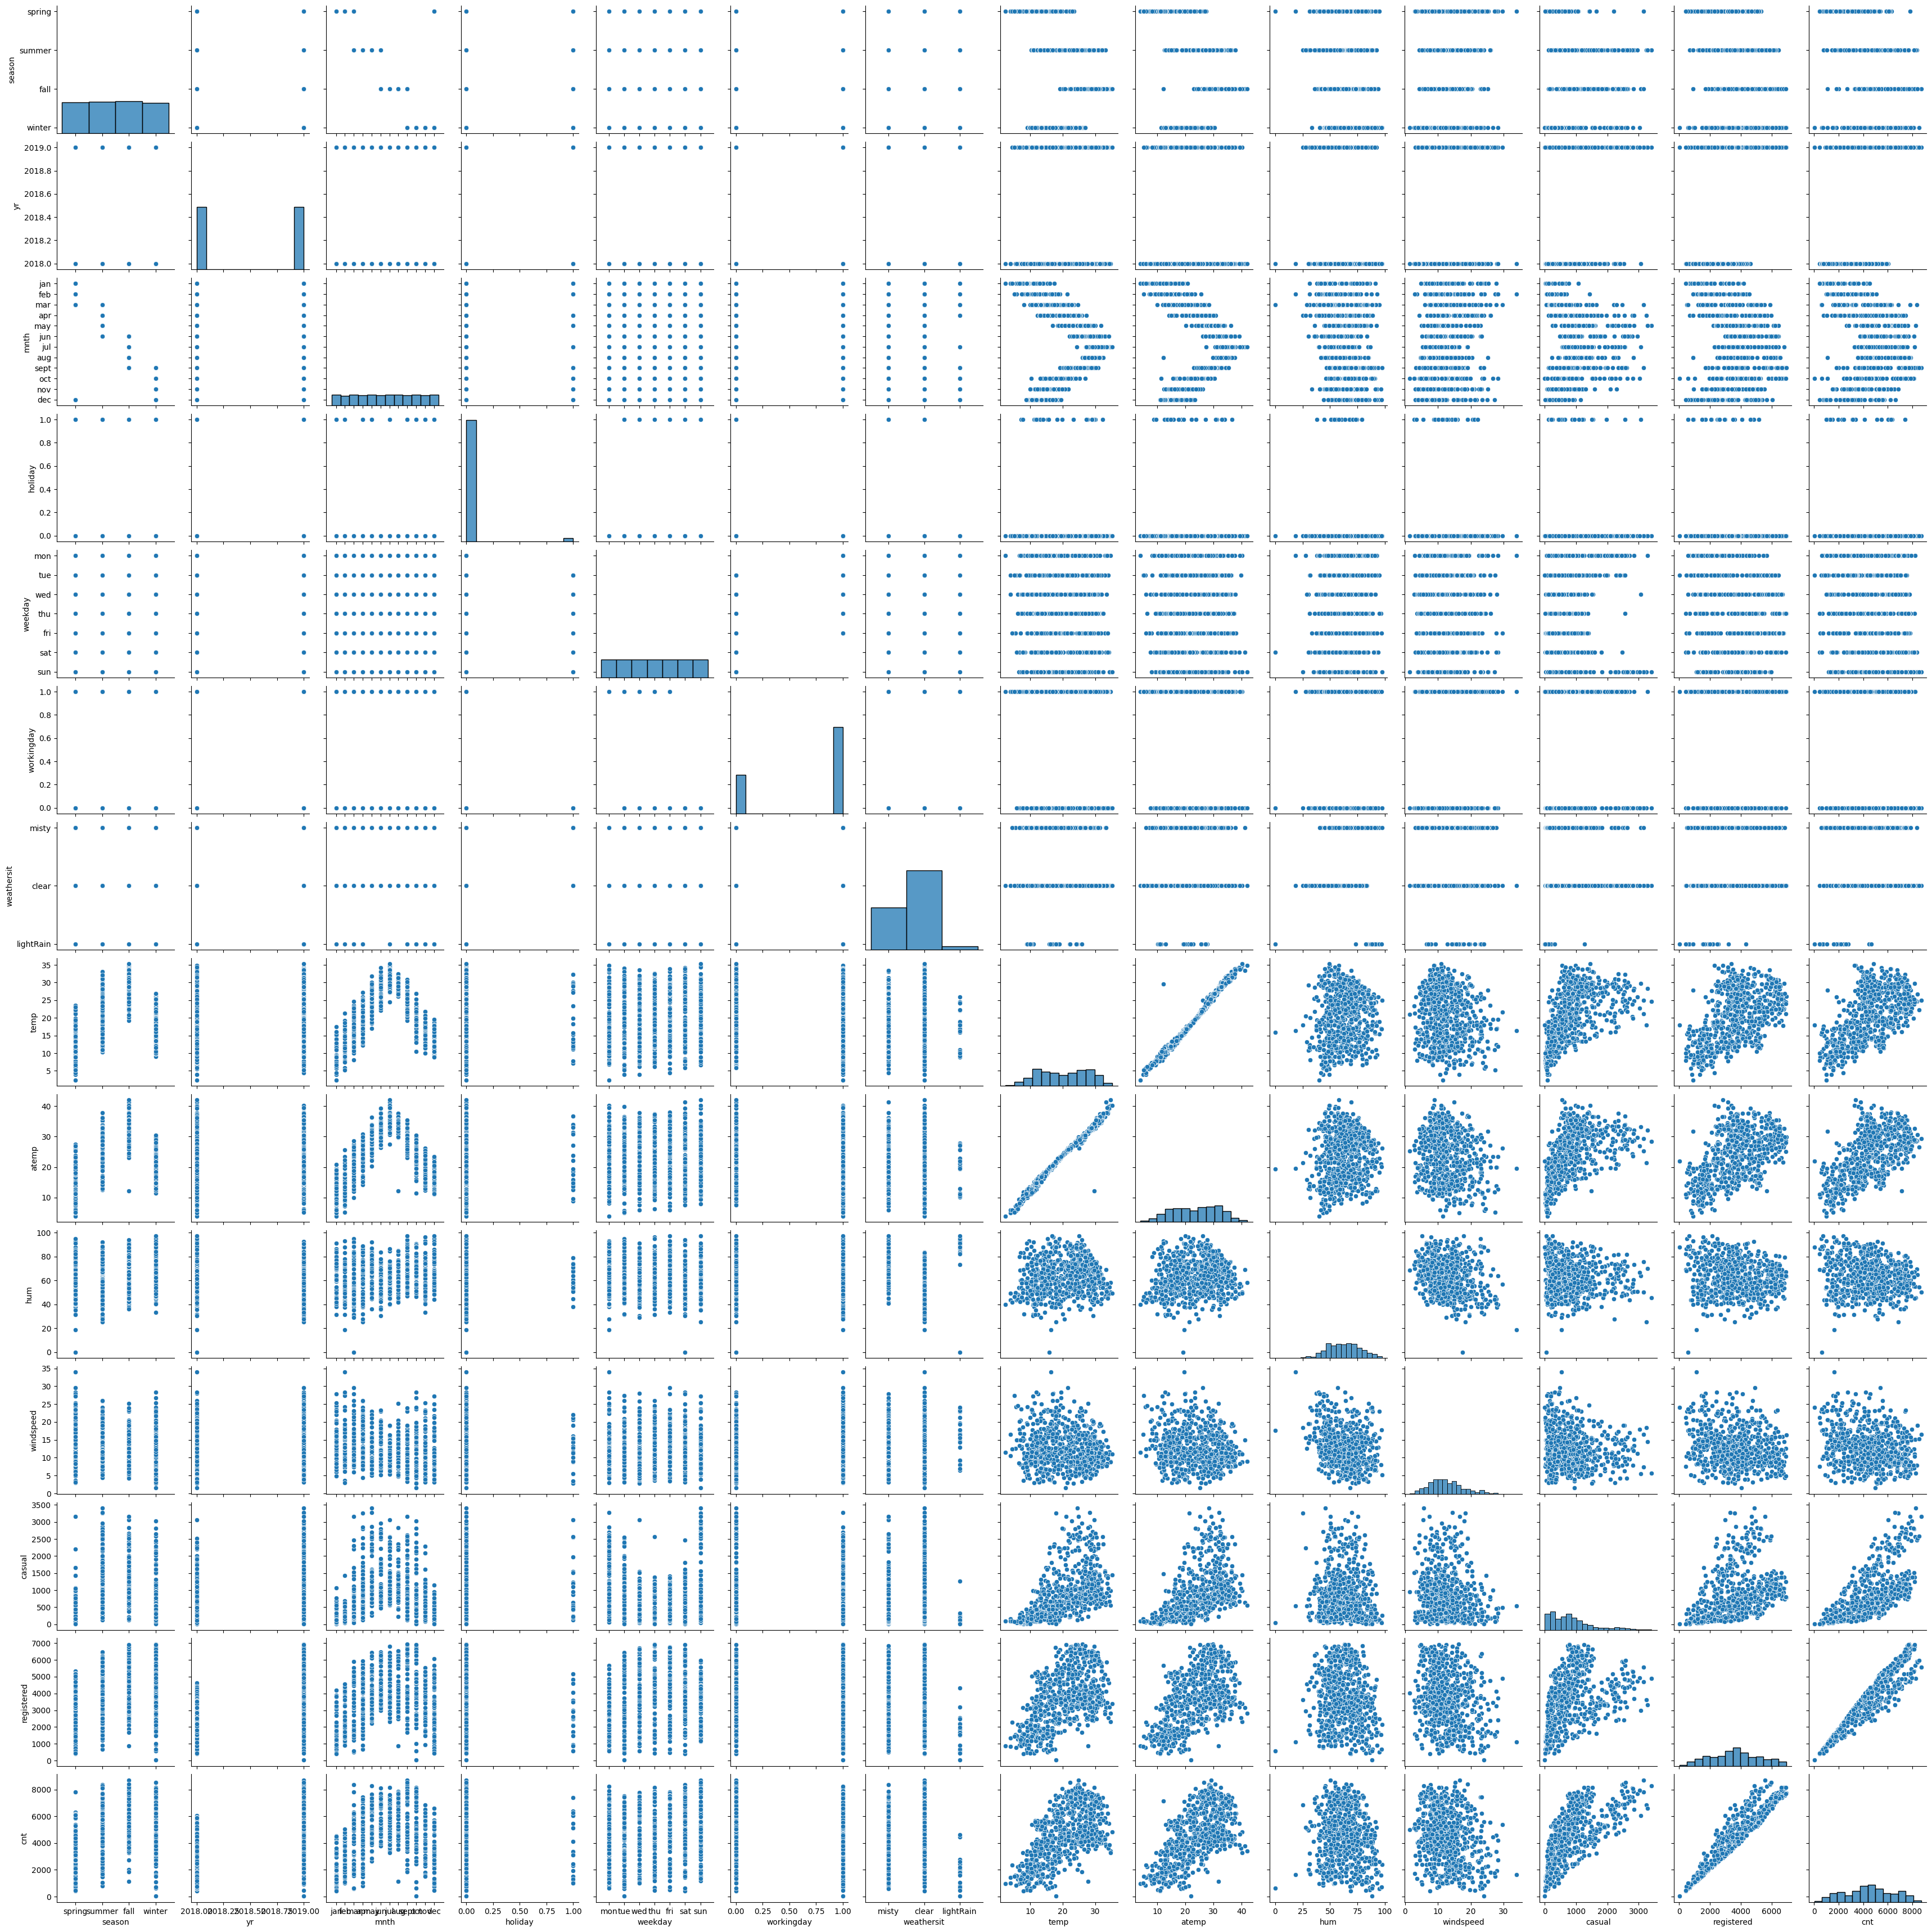

In [9]:
sns.pairplot(data=df, vars=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])
plt.show()

## Scatterplot for Numerical Variables

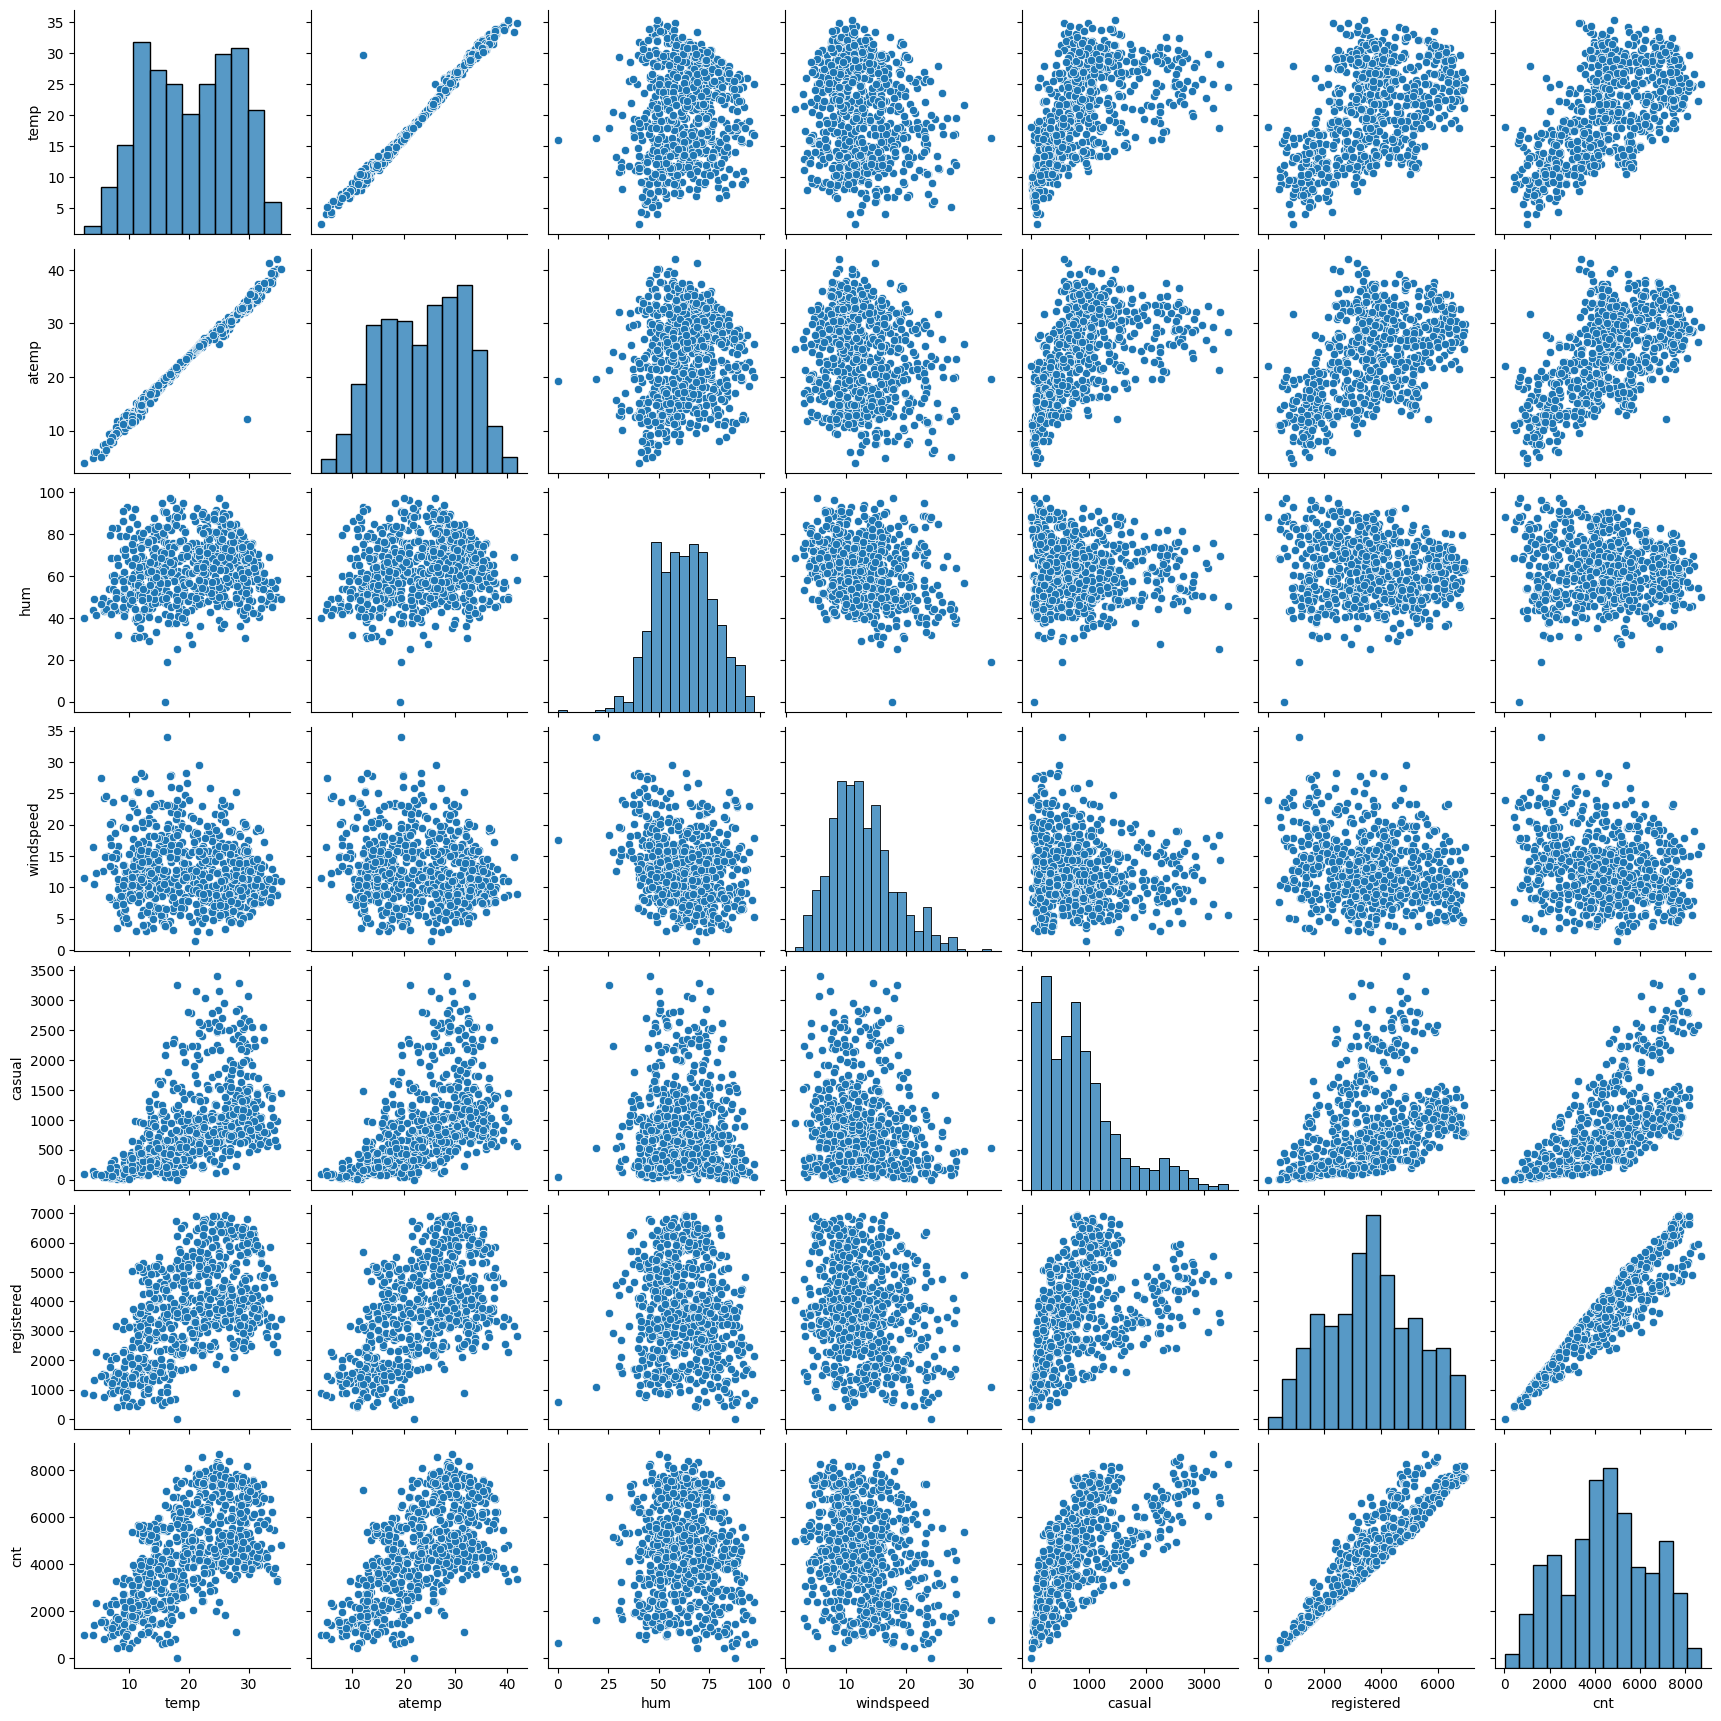

In [10]:
#scatterplot for numerical variable

sns.pairplot(data=df, vars=['temp','atemp', 'hum', 'windspeed',
            'casual', 'registered', 'cnt'])
plt.show()

## Correlation between Numeric Variables

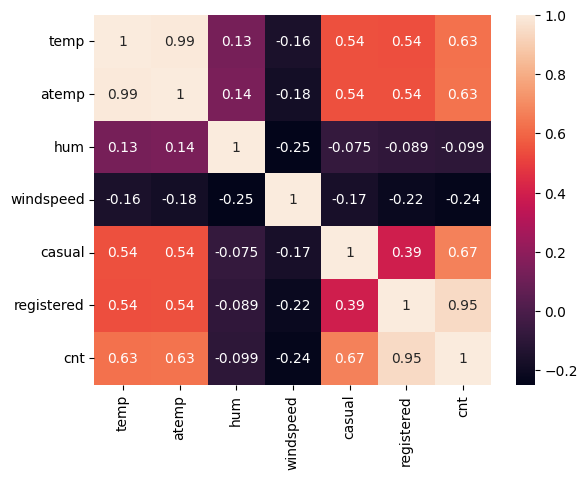

In [11]:
#heatmap to show correlation

sns.heatmap(df[['temp','atemp', 'hum', 'windspeed',
            'casual', 'registered', 'cnt']].corr(), annot = True)
plt.show()

# <b> Preparing Data </b>

## Droping unnecessary variables

instant variable is just index for the data<br>
The correlation as seen in the heatmp between temp and atemp is almost 1 and atemp is a derived version of temp, so we can drop it<br>
casual and registered are just categories of cnt, as cnt the y here, we can drop casual and registered<br>
dteday can be dropped as we have yr, mnth and weekday

In [12]:
df.drop(['atemp','instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
df.head()

season    yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring  2018  jan        0     mon           1      misty  14.110847   
1  spring  2018  jan        0     tue           1      misty  14.902598   
2  spring  2018  jan        0     wed           1      clear   8.050924   
3  spring  2018  jan        0     thu           1      clear   8.200000   
4  spring  2018  jan        0     fri           1      clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

## Creating Dummy Variables
We need to create dummy variables to replace the categorical variables

In [14]:
mnth_d=pd.get_dummies(df.mnth,drop_first=True,dtype=int)
weekday_d=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_d=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)
season_d=pd.get_dummies(df.season,drop_first=True,dtype=int)

In [15]:
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [16]:
df = pd.concat([df,mnth_d,weekday_d,weathersit_d,season_d],axis=1)
df.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  aug  dec  \
0  2018        0           1  14.110847  80.5833  10.749882   985    0    0   
1  2018        0           1  14.902598  69.6087  16.652113   801    0    0   
2  2018        0           1   8.050924  43.7273  16.636703  1349    0    0   
3  2018        0           1   8.200000  59.0435  10.739832  1562    0    0   
4  2018        0           1   9.305237  43.6957  12.522300  1600    0    0   

   feb  ...  sat  sun  thu  tue  wed  lightRain  misty  spring  summer  winter  
0    0  ...    0    0    0    0    0          0      1       1       0       0  
1    0  ...    0    0    0    1    0          0      1       1       0       0  
2    0  ...    0    0    0    0    1          0      0       1       0       0  
3    0  ...    0    0    1    0    0          0      0       1       0       0  
4    0  ...    0    0    0    0    0          0      0       1       0       0  

[5 rows x 29 columns]

In [17]:
df.shape

(730, 29)

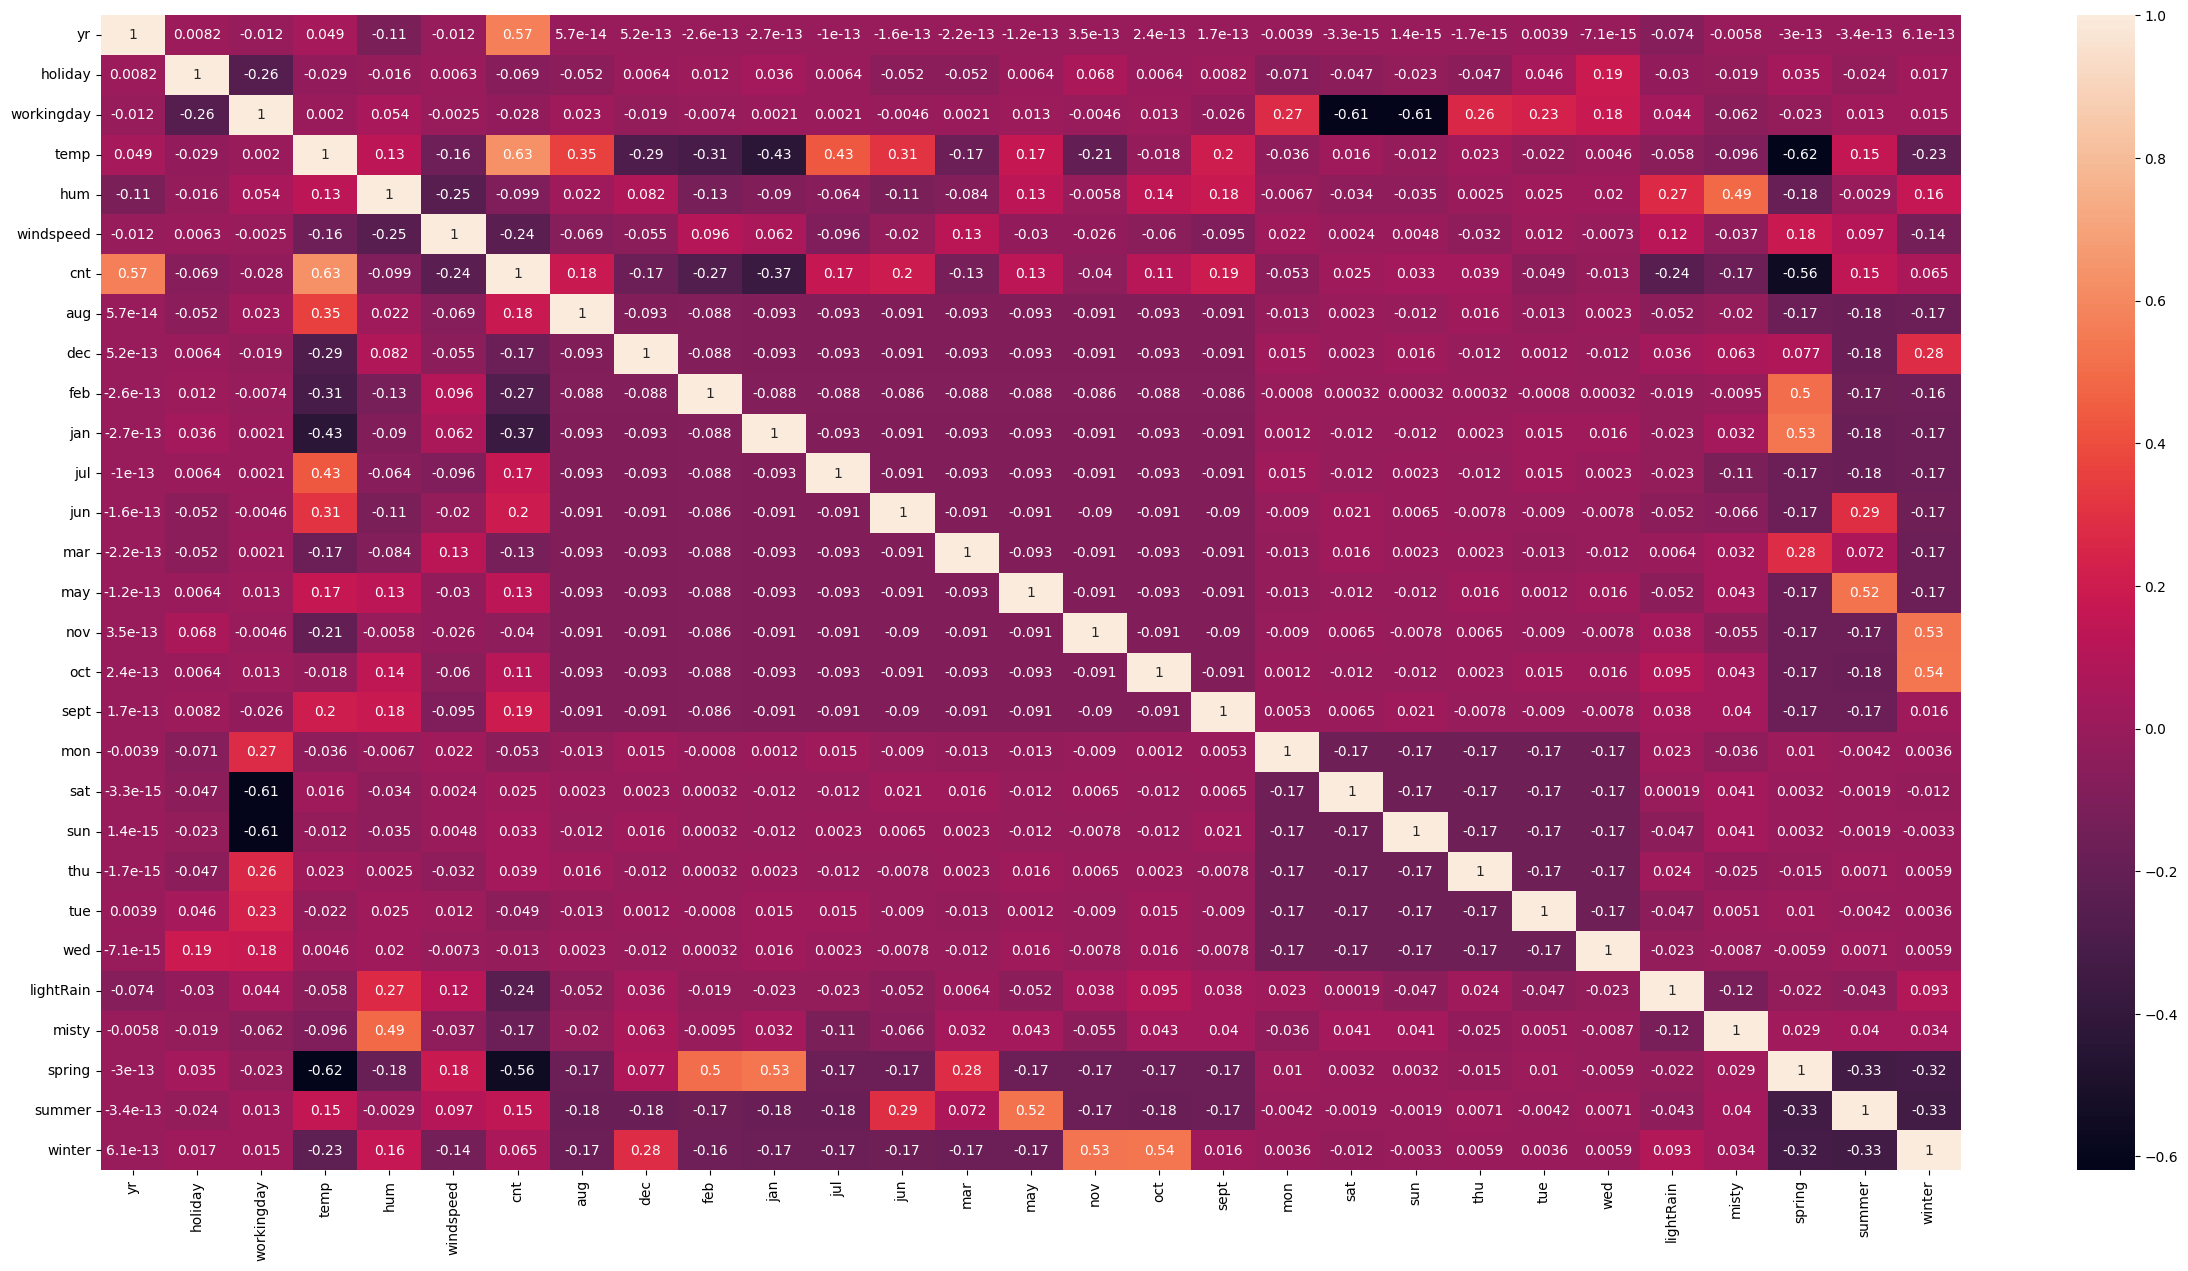

In [18]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

cnt has high positive correlation with yr and temp, and has high negetive correlation with spring and jan

## Splitting the Data into Training and Testing Sets<br>
Splitting data into 70:30 for train and test respectively

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [20]:
df_train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  aug  dec  \
576  2019        0           1  29.246653  70.4167  11.083475  7216    0    0   
426  2019        0           0  16.980847  62.1250  10.792293  4066    0    0   
728  2019        0           1  10.489153  48.3333  23.500518  1796    0    1   
482  2019        0           0  15.443347  48.9583   8.708325  4220    0    0   
111  2018        0           0  13.803347  72.9583  14.707907  1683    0    0   

     feb  ...  sat  sun  thu  tue  wed  lightRain  misty  spring  summer  \
576    0  ...    0    0    0    0    1          0      0       0       0   
426    0  ...    0    1    0    0    0          0      1       1       0   
728    0  ...    0    0    0    0    0          0      0       1       0   
482    0  ...    0    1    0    0    0          0      1       0       1   
111    0  ...    0    1    0    0    0          0      1       0       1   

     winter  
576       0  
426       0  
728       0  
482       0  
111       0  

[5 rows x 29 columns]

## Scaling Variables<br>
We're choosing MinMax scaling for this problem

In [21]:
#initalizing scaler
scaler = MinMaxScaler()

In [22]:
#fit_tramform scaler on the numerical variables on the data
vars=['temp','hum','windspeed','cnt']
df_train[vars] = scaler.fit_transform(df_train[vars])

In [23]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  aug  \
576  2019        0           1  0.815169  0.725633   0.264686  0.827658    0   
426  2019        0           0  0.442393  0.640189   0.255342  0.465255    0   
728  2019        0           1  0.245101  0.498067   0.663106  0.204096    0   
482  2019        0           0  0.395666  0.504508   0.188475  0.482973    0   
111  2018        0           0  0.345824  0.751824   0.380981  0.191095    0   

     dec  feb  ...  sat  sun  thu  tue  wed  lightRain  misty  spring  summer  \
576    0    0  ...    0    0    0    0    1          0      0       0       0   
426    0    0  ...    0    1    0    0    0          0      1       1       0   
728    1    0  ...    0    0    0    0    0          0      0       1       0   
482    0    0  ...    0    1    0    0    0          0      1       0       1   
111    0    0  ...    0    1    0    0    0          0      1       0       1   

     winter  
576       0  
426       0  
728       0  
482       0  
111       0  

[5 rows x 29 columns]

We had replaced 1 and 0 in yr variable with 2018 and 2019 for data visualization for better understanding<br>
converting it back to 1 and 0 to keep in scale

In [24]:
df_train.yr.replace({2018:0,2019:1},inplace = True)
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  aug  \
576   1        0           1  0.815169  0.725633   0.264686  0.827658    0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255    0   
728   1        0           1  0.245101  0.498067   0.663106  0.204096    0   
482   1        0           0  0.395666  0.504508   0.188475  0.482973    0   
111   0        0           0  0.345824  0.751824   0.380981  0.191095    0   

     dec  feb  ...  sat  sun  thu  tue  wed  lightRain  misty  spring  summer  \
576    0    0  ...    0    0    0    0    1          0      0       0       0   
426    0    0  ...    0    1    0    0    0          0      1       1       0   
728    1    0  ...    0    0    0    0    0          0      0       1       0   
482    0    0  ...    0    1    0    0    0          0      1       0       1   
111    0    0  ...    0    1    0    0    0          0      1       0       1   

     winter  
576       0  
426       0  
728       0  
482       0  
111       0  

[5 rows x 29 columns]

In [25]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         aug         dec         feb  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.096078    0.084314    0.066667  ...    0.129412   
std      0.224421    0.294988    0.278131    0.249689  ...    0.335985   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed   lightRain       misty  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.137255    0.143137    0.152941    0.135294    0.029412    0.345098   
std      0.344454    0.350557    0.360284    0.342373    0.169124    0.475867   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer      winter  
count  510.000000  510.000000  510.000000  
mean     0.243137    0.247059    0.247059  
std      0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

## Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

# <b>Building a linear model</b>
We have chosen a balanced approach of both Automated and Manual for Feature Selection. <br>
Using RFE(Reccursive Feature Elemination).

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

We are choosing 15 predictor variables as the threshold for RFE

In [28]:
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('lightRain', True, 1),
 ('misty', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1)]

In [30]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'sept', 'sat', 'sun', 'lightRain', 'misty', 'summer', 'winter'],
      dtype='object')

### Function to get VIF

In [31]:
def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [VIF(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [32]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'sept', 'sat', 'sun', 'lightRain', 'misty', 'summer', 'winter']]
getVIF(X_train_rfe)

Features    VIF
4          hum  35.54
2   workingday  30.68
3         temp  11.30
9          sun   6.39
8          sat   6.12
5    windspeed   5.26
11       misty   2.36
0           yr   2.07
13      winter   2.01
1      holiday   1.77
12      summer   1.71
6          jan   1.67
10   lightRain   1.27
7         sept   1.22

## Building Linear Model using StatsModel

In [33]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.1
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          7.23e-187
Time:                        01:20:49   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     495   BIC:                            -920.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2910      0.077      3.771      0.000       0.139       0.443
yr             0.2296      0.008     28.015      0.000       0.213       0.246
holiday       -0.1395      0.066     -2.126      0.034      -0.268      -0.011
workingday    -0.0528      0.071     -0.740      0.459      -0.193       0.087
temp           0.5432      0.023     23.240      0.000       0.497       0.589
hum           -0.1648      0.038     -4.347      0.000      -0.239      -0.090
windspeed     -0.1915      0.026     -7.390      0.000      -0.242      -0.141
jan           -0.0393      0.018     -2.225      0.027      -0.074      -0.005
sept           0.1042      0.016      6.653      0.000       0.073       0.135
sat           -0.0370      0.071     -0.521      0.603      -0.177       0.103
sun           -0.0316      0.071     -0.444      0.657      -0.171       0.108
lightRain     -0.2403      0.027     -9.056      0.000      -0.292      -0.188
misty         -0.0529      0.011     -4.993      0.000      -0.074      -0.032
summer         0.0852      0.011      8.056      0.000       0.064       0.106
winter         0.1302      0.011     11.326      0.000       0.108       0.153
==============================================================================
Omnibus:                       67.940   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.926
Skew:                          -0.751   Prob(JB):                     6.80e-31
Kurtosis:                       5.069   Cond. No.                         66.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
getVIF(X_train_rfe)

Features    VIF
4          hum  35.54
2   workingday  30.68
3         temp  11.30
9          sun   6.39
8          sat   6.12
5    windspeed   5.26
11       misty   2.36
0           yr   2.07
13      winter   2.01
1      holiday   1.77
12      summer   1.71
6          jan   1.67
10   lightRain   1.27
7         sept   1.22

#### VIF of hum is very high, but the p value is 0.000 which is significant, but it can dropped for it's VIF

## Building model by dropping hum

In [35]:
X_train_rfe.drop(['hum'], axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.1
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          5.20e-184
Time:                        01:21:02   Log-Likelihood:                 497.25
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     496   BIC:                            -907.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1862      0.075      2.495      0.013       0.040       0.333
yr             0.2335      0.008     28.165      0.000       0.217       0.250
holiday       -0.1287      0.067     -1.929      0.054      -0.260       0.002
workingday    -0.0393      0.073     -0.542      0.588      -0.182       0.103
temp           0.5180      0.023     22.474      0.000       0.473       0.563
windspeed     -0.1610      0.025     -6.342      0.000      -0.211      -0.111
jan           -0.0449      0.018     -2.504      0.013      -0.080      -0.010
sept           0.0987      0.016      6.208      0.000       0.067       0.130
sat           -0.0210      0.072     -0.290      0.772      -0.163       0.121
sun           -0.0149      0.072     -0.206      0.837      -0.157       0.127
lightRain     -0.2851      0.025    -11.452      0.000      -0.334      -0.236
misty         -0.0793      0.009     -8.967      0.000      -0.097      -0.062
summer         0.0821      0.011      7.636      0.000       0.061       0.103
winter         0.1196      0.011     10.457      0.000       0.097       0.142
==============================================================================
Omnibus:                       64.268   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.492
Skew:                          -0.728   Prob(JB):                     3.41e-28
Kurtosis:                       4.958   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
getVIF(X_train_rfe)

Features    VIF
2   workingday  15.61
3         temp  10.28
4    windspeed   4.99
8          sun   3.78
7          sat   3.63
0           yr   2.06
12      winter   1.92
11      summer   1.70
5          jan   1.65
10       misty   1.59
1      holiday   1.37
6         sept   1.21
9    lightRain   1.08

#### There is a significant change in VIF of other Variables after dropping hum<br><br> workingday has high VIF and also a high p value of 0.588<br> workingday can be dropped


## Building model by dropping workingday

In [37]:
X_train_rfe.drop(['workingday'], axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.4
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          4.08e-185
Time:                        01:21:12   Log-Likelihood:                 497.10
No. Observations:                 510   AIC:                            -968.2
Df Residuals:                     497   BIC:                            -913.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.020      7.457      0.000       0.108       0.186
yr             0.2338      0.008     28.275      0.000       0.218       0.250
holiday       -0.0955      0.026     -3.644      0.000      -0.147      -0.044
temp           0.5179      0.023     22.489      0.000       0.473       0.563
windspeed     -0.1616      0.025     -6.374      0.000      -0.211      -0.112
jan           -0.0448      0.018     -2.500      0.013      -0.080      -0.010
sept           0.0989      0.016      6.231      0.000       0.068       0.130
sat            0.0176      0.012      1.422      0.156      -0.007       0.042
sun            0.0237      0.012      1.957      0.051   -9.26e-05       0.047
lightRain     -0.2847      0.025    -11.450      0.000      -0.334      -0.236
misty         -0.0791      0.009     -8.958      0.000      -0.096      -0.062
summer         0.0820      0.011      7.635      0.000       0.061       0.103
winter         0.1190      0.011     10.460      0.000       0.097       0.141
==============================================================================
Omnibus:                       64.267   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.475
Skew:                          -0.731   Prob(JB):                     5.67e-28
Kurtosis:                       4.941   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
getVIF(X_train_rfe)

Features   VIF
2        temp  3.90
3   windspeed  3.34
0          yr  2.04
10     summer  1.62
9       misty  1.55
11     winter  1.42
4         jan  1.22
5        sept  1.21
7         sun  1.19
6         sat  1.17
8   lightRain  1.08
1     holiday  1.04

#### VIF values seem satisfying, but the p value of sat is high at 0.156<br><br>sat can be dropped

## Building model by dropping sat

In [39]:
X_train_rfe.drop(['sat'], axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          7.24e-186
Time:                        01:21:24   Log-Likelihood:                 496.06
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     498   BIC:                            -917.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.020      7.595      0.000       0.111       0.188
yr             0.2336      0.008     28.227      0.000       0.217       0.250
holiday       -0.0964      0.026     -3.678      0.000      -0.148      -0.045
temp           0.5187      0.023     22.505      0.000       0.473       0.564
windspeed     -0.1619      0.025     -6.381      0.000      -0.212      -0.112
jan           -0.0446      0.018     -2.487      0.013      -0.080      -0.009
sept           0.0990      0.016      6.231      0.000       0.068       0.130
sun            0.0210      0.012      1.754      0.080      -0.003       0.045
lightRain     -0.2834      0.025    -11.391      0.000      -0.332      -0.234
misty         -0.0785      0.009     -8.894      0.000      -0.096      -0.061
summer         0.0817      0.011      7.607      0.000       0.061       0.103
winter         0.1186      0.011     10.421      0.000       0.096       0.141
==============================================================================
Omnibus:                       63.576   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.687
Skew:                          -0.717   Prob(JB):                     3.09e-28
Kurtosis:                       4.977   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
getVIF(X_train_rfe)

Features   VIF
2        temp  3.81
3   windspeed  3.33
0          yr  2.04
9      summer  1.62
8       misty  1.54
10     winter  1.42
4         jan  1.21
5        sept  1.21
6         sun  1.16
7   lightRain  1.08
1     holiday  1.04

#### The p value of sun = 0.080 which is high<br><br>sun can be dropped

## Building model by dropping sun

In [41]:
X_train_rfe.drop(['sun'], axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          2.06e-186
Time:                        01:23:28   Log-Likelihood:                 494.49
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1522      0.020      7.737      0.000       0.114       0.191
yr             0.2338      0.008     28.198      0.000       0.218       0.250
holiday       -0.0976      0.026     -3.717      0.000      -0.149      -0.046
temp           0.5186      0.023     22.453      0.000       0.473       0.564
windspeed     -0.1610      0.025     -6.331      0.000      -0.211      -0.111
jan           -0.0453      0.018     -2.520      0.012      -0.081      -0.010
sept           0.0990      0.016      6.217      0.000       0.068       0.130
lightRain     -0.2845      0.025    -11.418      0.000      -0.333      -0.236
misty         -0.0774      0.009     -8.775      0.000      -0.095      -0.060
summer         0.0810      0.011      7.527      0.000       0.060       0.102
winter         0.1179      0.011     10.340      0.000       0.095       0.140
==============================================================================
Omnibus:                       57.673   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.516
Skew:                          -0.652   Prob(JB):                     5.00e-26
Kurtosis:                       4.944   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### P scores of all the variabls are satisfactory<br><br><b>The R-squared = 0.832<br>Adj. R-squared = 0.829<br>F-statistic = 248.0</b><br><br>the R-Squared and Adj. R-squared and F-statistic of the Model are good<br><br>This model is significant, and we can consider this the final model.

# <b>Residual Analysis of the train data<b>

In [42]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

576    0.766123
426    0.496901
728    0.406377
482    0.564414
111    0.273762
         ...   
578    0.803913
53     0.239332
350    0.251846
79     0.310385
520    0.642947
Length: 510, dtype: float64

### Plotting the Distribution of Error Terms of train data

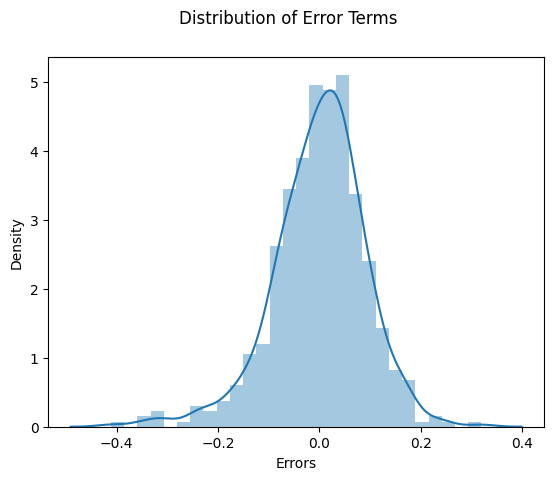

In [43]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Distribution of Error Terms') 
plt.xlabel('Errors')
plt.show()

#### Distribution of Error terms is <b>Normal</b>

# <b> Making Predictions Using the Final Model<b>

### Applying scaling on test set, based on the fit made on the training set

In [44]:
vars = ['temp', 'hum', 'windspeed','cnt']
df_test[vars] = scaler.transform(df_test[vars])
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  aug  \
184  2018        1           0  0.831783  0.657364   0.084219  0.692706    0   
535  2019        0           1  0.901354  0.610133   0.153728  0.712034    0   
299  2018        0           0  0.511964  0.837699   0.334206  0.303382    0   
221  2018        0           1  0.881625  0.437098   0.339570  0.547400    1   
152  2018        0           0  0.817246  0.314298   0.537414  0.569029    0   

     dec  feb  ...  sat  sun  thu  tue  wed  lightRain  misty  spring  summer  \
184    0    0  ...    0    0    0    0    1          0      1       0       0   
535    0    0  ...    0    0    1    0    0          0      0       0       1   
299    0    0  ...    1    0    0    0    0          0      1       0       0   
221    0    0  ...    0    0    0    0    0          0      0       0       0   
152    0    0  ...    1    0    0    0    0          0      0       0       1   

     winter  
184       0  
535       0  
299       1  
221       0  
152       0  

[5 rows x 29 columns]

In [45]:
df_test.yr.replace({2018:0,2019:1},inplace = True)
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.638221    0.313293   
std      0.500809    0.187620    0.480828    0.233187    0.148694    0.159584   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.355429    0.529197    0.198843   
50%      0.000000    0.000000    1.000000    0.558172    0.625590    0.300126   
75%      1.000000    0.000000    1.000000    0.755981    0.743798    0.402718   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

              cnt         aug         dec         feb  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.522154    0.059091    0.086364    0.100000  ...    0.172727   
std      0.219163    0.236333    0.281541    0.300684  ...    0.378873   
min      0.048205    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.378595    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.524678    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.677750    0.000000    0.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed   lightRain       misty  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.154545    0.140909    0.122727    0.159091    0.027273    0.318182   
std      0.362295    0.348721    0.328872    0.366595    0.163248    0.466833   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer      winter  
count  220.000000  220.000000  220.000000  
mean     0.254545    0.263636    0.236364  
std      0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

### Dividing into X_test and y_test

In [46]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Keeping only the Variables used in final model in X_test

In [47]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'jan', 'sept',
       'lightRain', 'misty', 'summer', 'winter'],
      dtype='object')

In [48]:
X_test = X_test[['yr', 'holiday', 'temp', 'windspeed', 'jan', 'sept',
       'lightRain', 'misty', 'summer', 'winter']]

In [49]:
X_test.head()

yr  holiday      temp  windspeed  jan  sept  lightRain  misty  summer  \
184   0        1  0.831783   0.084219    0     0          0      1       0   
535   1        0  0.901354   0.153728    0     0          0      0       1   
299   0        0  0.511964   0.334206    0     0          0      1       0   
221   0        0  0.881625   0.339570    0     0          0      0       0   
152   0        0  0.817246   0.537414    0     0          0      0       1   

     winter  
184       0  
535       0  
299       1  
221       0  
152       0

In [50]:
X_test_sm = sm.add_constant(X_test)

In [51]:
y_test_pred = lr.predict(X_test_sm)

### Plotting the Distribution of Error Terms for Test data

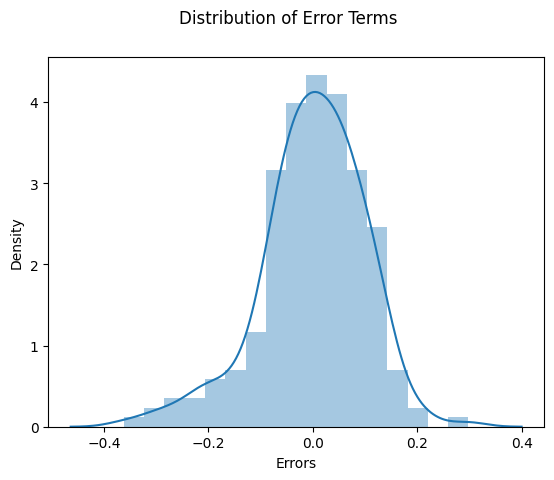

In [52]:
fig = plt.figure()
#sns.distplot()
sns.distplot((y_test - y_test_pred))
fig.suptitle('Distribution of Error Terms') 
plt.xlabel('Errors')
plt.show()

#### Distribution of Error terms is <b>Normal</b>

In [53]:
r2 = r2_score(y_test, y_test_pred)
r2

0.7920075467344522

#### The r2 score for test data = 0.792 which is closer to the r2 value of train data i.e 0.832

# <b>Evaluating the Model</b>

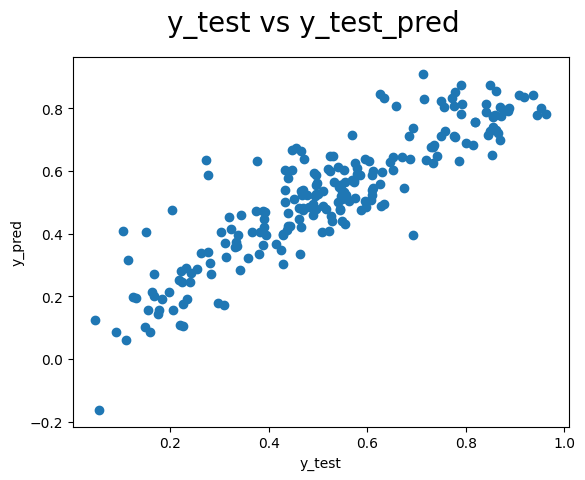

In [54]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test')
plt.ylabel('y_pred') 
plt.show()

In [55]:
lr.params

const        0.152188
yr           0.233820
holiday     -0.097638
temp         0.518565
windspeed   -0.160958
jan         -0.045258
sept         0.099009
lightRain   -0.284522
misty       -0.077418
summer       0.080981
winter       0.117863
dtype: float64

## The equation of the best fitted line is:

### $ cnt = 0.152188 + 0.233820(yr) - 0.097638(holiday) + 0.518565(temp) - 0.160958(windspeed) - 0.045258(jan) + 0.099009(sept) - 0.284522(lightRain) - 0.077418(misty) + 0.080981(summer) + 0.117863(winter)$

Significant variables to predict the demand for shared bikes:<br>

1. Year (yr)<br>
2. Holiday (holiday)<br>
3. Temperature (temp)<br>
4. Wind Speed (windspeed)<br>
5. Months -
    * January (jan)
    *  September (sept)<br>
6. Weather -
    * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (lightRain)
    * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (misty)<br>
7. Season -
    * Summer (summer)
    *  Winter (winter)<br>

